# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

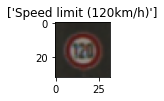

In [1]:
# Load pickled data
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

# Make sure the x, y have same shape for train, validation, and test images
assert(len(x_train) == len(y_train))
assert(len(x_valid) == len(x_valid))
assert(len(x_test) == len(y_test))

# Get a random index
index = random.randint(0, len(x_train))

# Read in csv vile to match up description with image id
sign_id_df = pd.read_csv("./signnames.csv")
img_desc = sign_id_df[sign_id_df['ClassId'] == y_train[index]]['SignName'].values


# Show a random image from the dataset
plt.figure(figsize=(1,1))
plt.title(img_desc)
plt.imshow(x_train[index])


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of validation examples
n_validation = len(x_valid)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

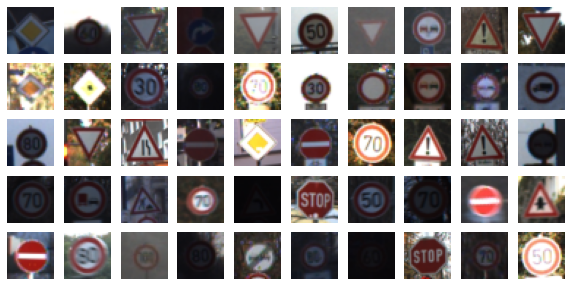

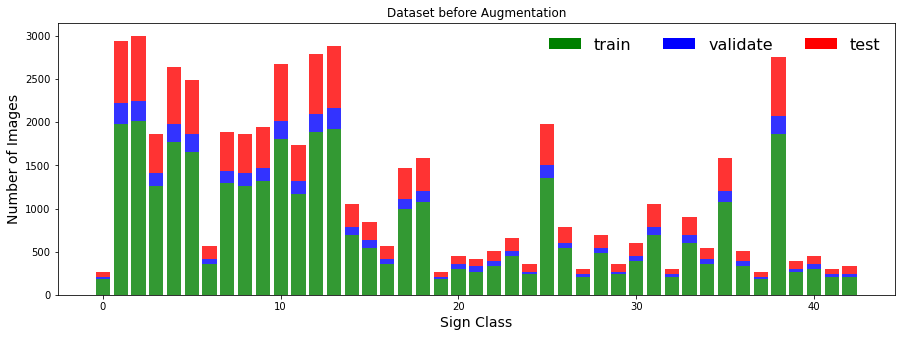

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import seaborn as sns
import collections
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Plot images
plt.figure(figsize=(10,5))
for i in range(50):
    # Get a random index
    index = random.randint(0, len(x_train))
    plt.subplot(5,10, i+1)
    plt.axis('off')
    plt.imshow(x_train[index])

# Dictionary to store number of images for each class in each dataset
data_count = {}
data_count['train_count'] = collections.Counter(y_train)
data_count['valid_count'] = collections.Counter(y_valid)
data_count['test_count'] = collections.Counter(y_test)

# Create a dataframe from above dictionary
df = pd.DataFrame.from_dict(data_count, orient='columns').reset_index()
df = df.rename(columns={'index':'ClassId'})

# Plot the 3 data sets on the same bar chart
plt.figure(figsize=(15,5))
train = plt.bar(df['ClassId'].values, df['train_count'].values, alpha=0.8, color='g')
valid = plt.bar(df['ClassId'].values, df['valid_count'].values, alpha=0.8, color='b', bottom=df['train_count'].values)
test = plt.bar(df['ClassId'].values, df['test_count'].values, alpha=0.8, color='r', bottom=df['train_count'].values + df['valid_count'].values)

# Create legend
topbar = plt.Rectangle((0,0),1,1,fc='r', edgecolor = 'none')
middlebar = plt.Rectangle((0,0),1,1,fc='b', edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='g',  edgecolor = 'none')
l = plt.legend([bottombar, middlebar, topbar], ['train', 'validate', 'test'], loc=1, ncol = 3, prop={'size':16})
l.draw_frame(False)

plt.title('Dataset before Augmentation')
plt.xlabel('Sign Class', fontsize=14), 
plt.ylabel('Number of Images', fontsize=14)
plt.show()

# plt.figure(figsize=(20,5))
# #sns.barplot(df['ClassId'].values, df['valid_count'].values, alpha=0.8)
# plt.title('Sign Type Distribution for Validation Dataset')
# plt.xlabel('Sign Class', fontsize=14)
# plt.ylabel('Number of Images', fontsize=14)
# plt.show()

# plt.figure(figsize=(20,5))
# #sns.barplot(df['ClassId'].values, df['test_count'].values, alpha=0.8)
# plt.title('Sign Type Distribution for Testing Dataset')
# plt.xlabel('Sign Class', fontsize=14)
# plt.ylabel('Number of Images', fontsize=14)
# plt.show()



### Sign Type Distribution 

Each dataset (train, validation, test) has a very similar distribution but each dataset has more images for sign ID's from 0-13. I will try augmenting images from smaller classes to see if this has any improvement in accuracy.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Convert images to Grayscale and Normalize

In [4]:
import skimage
import cv2
import tensorflow as tf

def preprocess(images):
    """
    This function preprocesses a give dataset of images
        1. Convert image to grayscale
        2. normalize image
    """
    
    # Create array for processed images
    processed_images = np.zeros((images.shape[0], images.shape[1], images.shape[2], 1), dtype='float32')
    
    for idx, image in enumerate(images):
        
        # Convert image to gray scale
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        
        # Reshape array from 32x32 to 32x32x1
        gray = gray.reshape((32, 32, 1))

        # Normalize image with openCV
        #norm_img = cv2.normalize(gray, None, 0.0, 1.0, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        # Manually normalize image
        norm_img = (gray - np.min(gray)) / (np.max(gray) - np.min(gray))

        # Shift the pixel values to be between -1 and 1
        norm_img = 2 * norm_img - 1
        
        # Add processed image to array
        processed_images[idx] = norm_img
        
    return processed_images

pp_x_train = preprocess(x_train)

print(pp_x_train.shape)
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

(34799, 32, 32, 1)


### Data Augmentation

Techniques:
* Flipping - Flip the image vertically or horizontall
* Rotation - Rotate image by specified degree
* Shearing - Shifts one part of the image like a parallelogram
* Cropping - Object appears in different positions in differen't proprotions in the image
* Zoom In
* Zoom Out
* Change Brightness
* Change Contrast

8 255
11.171044350808828 255.0
(32, 32, 3)
(37, 37, 3)


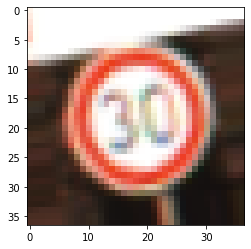

In [46]:
import skimage
from skimage import transform
from skimage.filters import gaussian
import skimage.exposure
from PIL import Image, ImageEnhance
import cv2
import random
from itertools import combinations
#random.seed(5)

options = [1, 2, 3, 4, 5]

test_img = x_train[3002].astype('uint8').copy()


def rotate_image(image, angle_threshold=10):
    """
    Function to rotate images randomly by +- angle_threshold degrees
    """
    angle = random.uniform(-angle_threshold, angle_threshold)
    return transform.rotate(image, angle, resize=True, cval=0, preserve_range=True, mode='edge')

def blur_image(image):
    """
    Function to blur an image
    """
    sigma = random.uniform(0, 1)
    return gaussian(image, sigma=(sigma, sigma), multichannel=True)

## NOT USED
def flip_image(image, direction='h'):
    """
    Function to flip image horizontally(h), vertically(v), horizontally and vertically(hv)
    """
    if direction == 'h':
        flip_code = 1
    if direction == 'v':
        flip_code = 0
    if direction =='hv' or direction =='vh':
        flip_code = -1     
    return cv2.flip(image, flip_code)

def shear_image(image, shear_angle_th=0.2):
    """
    Function to shear image
    """
    shear_angle = random.uniform(-shear_angle_th, shear_angle_th)
    affine_tf = transform.AffineTransform(shear=shear_angle)
    
    return transform.warp(image, inverse_map=affine_tf, mode='edge')

def translate_image(image, pixle_range=2):
    """
    Function to translage image by x and y
    """
    x = random.randint(-pixle_range, pixle_range)
    y = random.randint(-pixle_range, pixle_range)

    #Skimage
    tform = transform.SimilarityTransform(translation=(x, y))
    #translation_tf = transform.AffineTransform(translation=(x,y))
    return transform.warp(image, inverse_map=tform, mode='edge')

## ONLY WORKS ON RGB IMAGE
def adjust_gamma(image, gamma=1.0):
    image = image.astype('uint8')
    gamma = random.uniform(0.5, 1.5)
    invGamma = 1.0 / gamma
    # build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)
    


def augment_image(image, total_combinations):
    
    rand_num = random.randint(0,30)
    combo = total_combinations[rand_num]

    # Adjust gamma
    if 1 in combo:
        image = adjust_gamma(image)
        
    # Blur image   
    if 2 in combo:
        image = blur_image(image)
        
    # Shear image    
    if 3 in combo: 
        image = shear_image(image)
        
    # Translate image
    if 4 in combo:
        image = translate_image(image)
        
    # Rotate image
    if 5 in combo:
        image = rotate_image(image)
        
    return image
        

# Create total number of combinations for augmenting an image
total_combinations = []
for i in range(1,6):
    comb = combinations(options, i)
    for num in comb:
        total_combinations.append(num)
    

##TODO: Create random augmentation on classes that need more images

# Iterate through every image of every class and perform a random
# data augmentation technique

x_train_aug = []
y_train_aug = []

# # Create array for augmented images
# # x_train_aug = np.zeros((images.shape[0], images.shape[1], images.shape[2], 3), dtype='float32')
# # y_train_aug = np.zeros((images.shape[0], images.shape[1], images.shape[2], 3), dtype='float32')

for idx in range(0, len(x_train)):
    
    x_train_aug.append(augment_image(x_train[idx], total_combinations))
    y_train_aug.append(y_train[idx])
    
    



#########################################################
# Testing above functions individually
#########################################################
# aug_img = augment_image(test_img, total_combinations)
# plt.imshow(aug_img)

# tmp = adjust_gamma(test_img)
# tmp = shear_image(test_img)
# tmp = translate_image(tmp)
# tmp = blur_image(tmp)

# test_img = test_img.astype('uint8')
# new_img = rotate_image(test_img)

# plt.imshow(new_img.astype('uint8'))

# print(test_img.min(), test_img.max())
# print(new_img.min(), new_img.max())

# print(test_img.shape)
# print(new_img.shape)




# plt.figure()
# plt.title("No Lighten")
# plt.imshow(test_img, cmap='gray')

# plt.figure()
# plt.title("Lighten")
# plt.imshow(gamma_correction, cmap='gray')

# plt.figure()
# plt.imshow(blur, cmap='gray')



### Dataset Visualization after Data Augmentation

34799
[[[233 218 231]
  [205 173 175]
  [135 118 101]
  ...
  [103 106  87]
  [107 111  84]
  [ 98  98  75]]

 [[228 208 205]
  [207 159 144]
  [143 119  95]
  ...
  [106 106  84]
  [107 109  81]
  [ 98  98  73]]

 [[254 244 225]
  [230 202 171]
  [150 113  84]
  ...
  [105 102  78]
  [109 113  84]
  [103 102  75]]

 ...

 [[255 254 253]
  [241 242 247]
  [215 204 204]
  ...
  [ 91  98  70]
  [ 89 100  76]
  [ 93 103  77]]

 [[255 255 255]
  [255 255 255]
  [245 239 229]
  ...
  [ 96 105  75]
  [ 94 106  79]
  [ 97 106  78]]

 [[255 255 255]
  [255 255 255]
  [255 254 248]
  ...
  [101 110  82]
  [102 111  87]
  [103 110  82]]]
[[[0.84241581 0.74400842 0.82577092]
  [0.66218038 0.48217009 0.48976421]
  [0.3027739  0.23576576 0.17325646]
  ...
  [0.180497   0.19215686 0.12930679]
  [0.19592104 0.20762016 0.12148991]
  [0.1648109  0.16485019 0.09810481]]

 [[0.80865603 0.68338764 0.6651381 ]
  [0.69755846 0.46109412 0.40066206]
  [0.39591818 0.26974859 0.19006456]
  ...
  [0.19198889 0.1

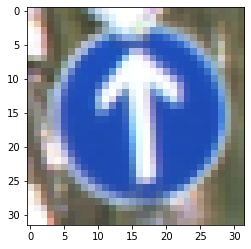

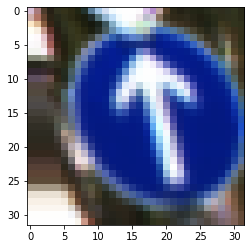

In [17]:
print(len(x_train_aug))

num = 20001
plt.figure()
plt.imshow(x_train[num])

plt.figure()
plt.imshow(x_train_aug[num])

print(x_train[num])
print(x_train_aug[num])

# Dictionary to store number of images for each class in each dataset
# data_count = {}
# data_count['train_count'] = collections.Counter(y_train)
# data_count['train_aug_count'] = collections.Counter(y_train_aug)
# data_count['valid_count'] = collections.Counter(y_valid)
# data_count['test_count'] = collections.Counter(y_test)

# # Create a dataframe from above dictionary
# df = pd.DataFrame.from_dict(data_count, orient='columns').reset_index()
# df = df.rename(columns={'index':'ClassId'})

# # Plot the 3 data sets on the same bar chart
# plt.figure(figsize=(15,5))
# train = plt.bar(df['ClassId'].values, df['train_count'].values, alpha=0.8, color='g')
# train_aug = plt.bar(df['ClassId'].values, df['train_aug_count'].values, alpha=0.8, color='orange', bottom=df['train_count'].values)
# valid = plt.bar(df['ClassId'].values, df['valid_count'].values, alpha=0.8, color='b', bottom=df['train_count'].values + df['train_aug_count'].values)
# test = plt.bar(df['ClassId'].values, df['test_count'].values, alpha=0.8, color='r', bottom=df['train_count'].values + df['train_aug_count'].values + df['valid_count'].values)

# # Create legend
# topbar = plt.Rectangle((0,0),1,1,fc='r', edgecolor = 'none')
# middlebar2 = plt.Rectangle((0,0),1,1,fc='orange', edgecolor = 'none')
# middlebar = plt.Rectangle((0,0),1,1,fc='b', edgecolor = 'none')
# bottombar = plt.Rectangle((0,0),1,1,fc='g',  edgecolor = 'none')
# l = plt.legend([bottombar, middlebar2, middlebar, topbar], ['train', 'train_aug', 'validate', 'test'], loc=1, ncol = 4, prop={'size':16})
# l.draw_frame(False)

# plt.title('Dataset before Augmentation')
# plt.xlabel('Sign Class', fontsize=14), 
# plt.ylabel('Number of Images', fontsize=14)
# plt.show()


In [16]:
## Append train and train_aug datasets together
x_train_aug = np.asarray(x_train_aug)
y_train_aug = np.asarray(y_train_aug)
print(x_train_aug)

x_train_dataset = np.concatenate(x_train, x_train_aug)
y_train_dataset = np.concatenate(y_train, y_train_aug)

assert(x_train_dataset.shape == y_train_dataset.shape)


[[[[1.07631535e-01 9.97172469e-02 9.86144037e-02]
   [1.08165776e-01 1.00215104e-01 9.90473121e-02]
   [1.08700017e-01 1.00712961e-01 9.94802205e-02]
   ...
   [1.49568922e-01 1.11797055e-01 9.51379445e-02]
   [1.36652332e-01 1.09891656e-01 9.42129716e-02]
   [1.28871193e-01 1.09676135e-01 9.42436690e-02]]

  [[1.06323500e-01 9.88549265e-02 9.76514831e-02]
   [1.06046857e-01 9.84721895e-02 9.73933277e-02]
   [1.05650084e-01 9.79996665e-02 9.69251091e-02]
   ...
   [1.46702777e-01 1.11156161e-01 9.48469422e-02]
   [1.35415983e-01 1.09860920e-01 9.41840617e-02]
   [1.27788326e-01 1.09643591e-01 9.42725039e-02]]

  [[1.05422106e-01 9.80559916e-02 9.65419262e-02]
   [1.06144071e-01 9.88937005e-02 9.73121498e-02]
   [1.05903883e-01 9.91646520e-02 9.66283150e-02]
   ...
   [1.42880193e-01 1.10417544e-01 9.51305889e-02]
   [1.34068720e-01 1.09829189e-01 9.41770397e-02]
   [1.26705459e-01 1.09611048e-01 9.43013389e-02]]

  ...

  [[1.22846476e-01 9.68626804e-02 8.68559871e-02]
   [1.20499660e-

TypeError: only integer scalar arrays can be converted to a scalar index

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")